### **Project COVID**

Insight questions on COVID-19 dataset:
- Which countries have the top 5 highest total deaths?
- Which country's has highest % of population vaccinated? Lowest?

- What is the correlation between human development index (HDI) and total deaths per country or icu_patients_per_million?

- Is population density a strong indicator of death rate in country?

- Correlation between COVID-19 stringency index at location and new cases per million

In [109]:
#Importing libraries and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [110]:
#Reading the csv data
covid_data= pd.read_csv('owid-covid-data.csv')

In [111]:
# Taking a look at the first 5 rows of data
covid_data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [145]:
# Looking at info on the dataset
covid_data.info() #Data consists of float64 and object data types, there are unequal counts of the majority of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

The dataset contains 67 columns x 166326 rows, consists mainly of object and float64 (numeric) data types, and has 85.0+ MB memory usage.

In [141]:
#checking for duplicates in all columns
covid_duplic_data = covid_data.duplicated()

# total count of duplicates in covid_data
total_duplic_data = sum(covid_duplic_data == True)
print(total_duplic_data)

0


0 duplicates were found in the `covid_data` dataset, so removing rows is unnecessary so far.

In [157]:
#Separating categoric and numeric variables
covid_data_num_vars = covid_data.select_dtypes(include='number')
covid_data_categ_vars = covid_data.select_dtypes(include='category')

print(covid_data_num_vars)

print(covid_data_categ_vars)


        total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0               5.0        5.0                 NaN           NaN         NaN   
1               5.0        0.0                 NaN           NaN         NaN   
2               5.0        0.0                 NaN           NaN         NaN   
3               5.0        0.0                 NaN           NaN         NaN   
4               5.0        0.0                 NaN           NaN         NaN   
...             ...        ...                 ...           ...         ...   
166321     236871.0      491.0             413.000        5395.0         0.0   
166322     237503.0      632.0             416.286        5396.0         1.0   
166323     237503.0        0.0             362.286        5396.0         0.0   
166324     238739.0     1236.0             467.429        5397.0         1.0   
166325     239019.0      280.0             459.429        5397.0         0.0   

        new_deaths_smoothed  total_case

In [131]:
#Finding amount of missing data in all columns
cols_missing_data = covid_data.isnull().sum()

#Calculating % missing data per column
percent_missing_data = round((cols_missing_data/covid_data.shape[0])*100,2)

#Identifying the top 15 columns missing data (by %)
top_cols_missing_data = percent_missing_data.nlargest(15)
print(top_cols_missing_data)




weekly_icu_admissions                      96.73
weekly_icu_admissions_per_million          96.73
excess_mortality_cumulative_absolute       96.58
excess_mortality_cumulative                96.58
excess_mortality                           96.58
excess_mortality_cumulative_per_million    96.58
weekly_hosp_admissions                     93.43
weekly_hosp_admissions_per_million         93.43
total_boosters                             89.46
total_boosters_per_hundred                 89.46
icu_patients                               85.89
icu_patients_per_million                   85.89
hosp_patients                              85.20
hosp_patients_per_million                  85.20
new_vaccinations                           77.49
dtype: float64


The columns from `weekly_icu_admissions` to `weekly_hosp_admissions_per_million` have the highest % of missing data by a 5% margin compared to the columns that follow. Although these columns would be interesting to explore, all are mostly missing data, so they will be dropped.

In [89]:

# 3. Dropping the columns below
data_drop = covid_data.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality','excess_mortality_cumulative_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'])

In [90]:
# Viewing the updated shape of covid_data dataset
covid_data_shape = covid_data.shape 
print(covid_data_shape)

(166326, 67)


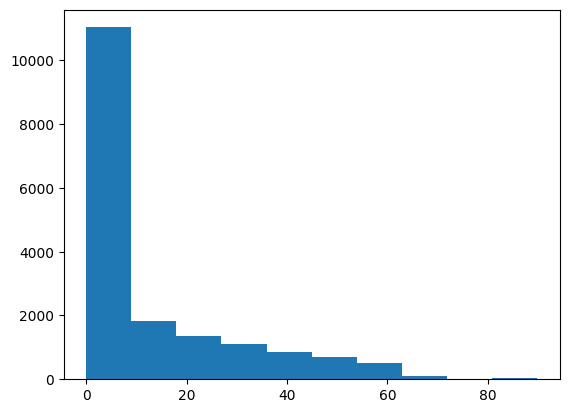

In [99]:
total_boosters_per_hundred_hist = plt.hist(covid_data['total_boosters_per_hundred'])

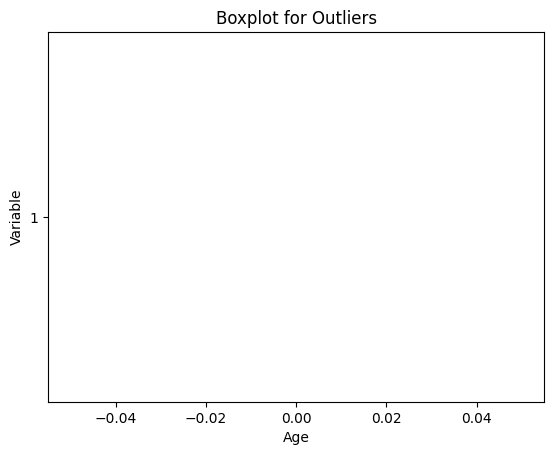

In [105]:
# Finding out if there are outliers in our data with a box-and-whiskers plot
plt.boxplot(covid_data['icu_patients'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Boxplot for Outliers')
plt.show()




In [106]:
"hi"

'hi'

In [ ]:
# Exploratory Data Analysis 